# Jonathan Halverson
# Tuesday, December 19, 2017
# Simple RNN for time series

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

This is an unusual example in that the number of inputs per output is 1. In real cases one would have multiple inputs corresponding to a single output.

In [2]:
n_steps = 25
n_inputs = 1
n_neurons = 100
n_outputs = 1

In [46]:
import numpy as np
import tensorflow as tf

In [4]:
tf.reset_default_graph()

In [5]:
X = tf.placeholder(dtype=tf.float32, shape=(None, n_steps, n_inputs))
y = tf.placeholder(dtype=tf.float32, shape=(None, n_steps, n_outputs))

In [6]:
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
cell = tf.contrib.rnn.OutputProjectionWrapper(basic_cell, output_size=n_outputs)
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [7]:
loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
training_op = optimizer.minimize(loss)

In [8]:
init = tf.global_variables_initializer()

In [9]:
t = np.linspace(0, 100, num=1000)
f = t * np.sin(t) / 10.0 + 2.0 * np.sin(5.0 * t)

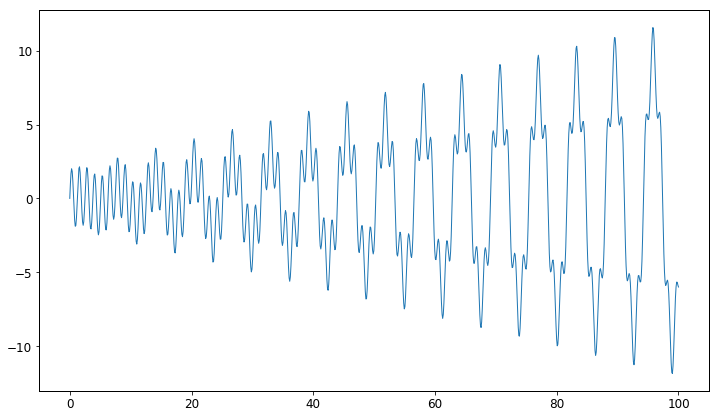

In [10]:
plt.figure(figsize=(12,7))
plt.plot(t, f)

In [11]:
def fetch_batch(batch_size):
    # could be done with numpy vector operations (see Geron)
    a_batch = []
    b_batch = []
    for _ in range(batch_size):
        rnd_index = np.random.choice(np.arange(1, 280))
        a_batch.append(f[rnd_index - 1: rnd_index + n_steps - 1].reshape(-1, 1))
        b_batch.append(f[rnd_index: rnd_index + n_steps].reshape(-1, 1))
    return np.asarray(a_batch), np.asarray(b_batch)

In [12]:
n_iterations = 2000
with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations + 1):
        X_batch, y_batch = fetch_batch(batch_size=50)
        sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X:X_batch, y:y_batch})
            print(iteration, "  MSE:", mse)
    idx = 100
    X_new = f[idx:idx + n_steps].reshape(1, n_steps, 1)
    X_target = f[idx + 1:idx + n_steps + 1]
    y_pred = sess.run(outputs, feed_dict={X:X_new})

    idx = 250
    t_start = t[idx:idx + n_steps]
    f_start = f[idx:idx + n_steps] + np.random.randn(n_steps)
    f_start = np.zeros(n_steps)
    
    x_test = list(f_start)
    for h in range(100 * n_steps):
        x_pred = sess.run(outputs, feed_dict={X:np.array(x_test[-n_steps:]).reshape(1, n_steps, 1)})
        x_test.append(x_pred[0, -1, 0])

0   MSE: 2.8850281
100   MSE: 0.13005888
200   MSE: 0.05423268
300   MSE: 0.03232858
400   MSE: 0.024120986
500   MSE: 0.029249493
600   MSE: 0.026784902
700   MSE: 0.026794977
800   MSE: 0.021024138
900   MSE: 0.024436595
1000   MSE: 0.026709192
1100   MSE: 0.026357004
1200   MSE: 0.021884423
1300   MSE: 0.027467446
1400   MSE: 0.0202007
1500   MSE: 0.02443599
1600   MSE: 0.02633524
1700   MSE: 0.023542594
1800   MSE: 0.021116195
1900   MSE: 0.02167041
2000   MSE: 0.02449663


In [13]:
print(outputs.shape, states.shape)

(?, 25, 1) (?, 100)


In [14]:
y_pred.shape

(1, 25, 1)

In [15]:
X_new = np.squeeze(X_new)
y_pred = np.squeeze(y_pred)

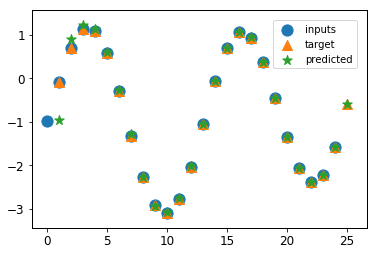

In [16]:
plt.scatter(np.arange(n_steps), X_new, marker='o', s=125, label='inputs')
plt.scatter(np.arange(n_steps) + 1, X_target, marker='^', s=100, label='target')
plt.scatter(np.arange(n_steps) + 1, y_pred, marker='*', s=100, label='predicted')
plt.legend()

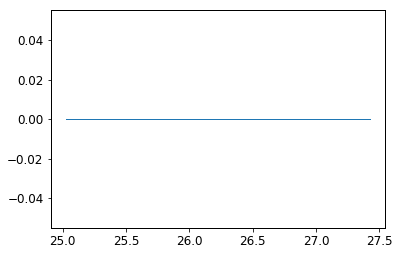

In [17]:
plt.plot(t_start, f_start)

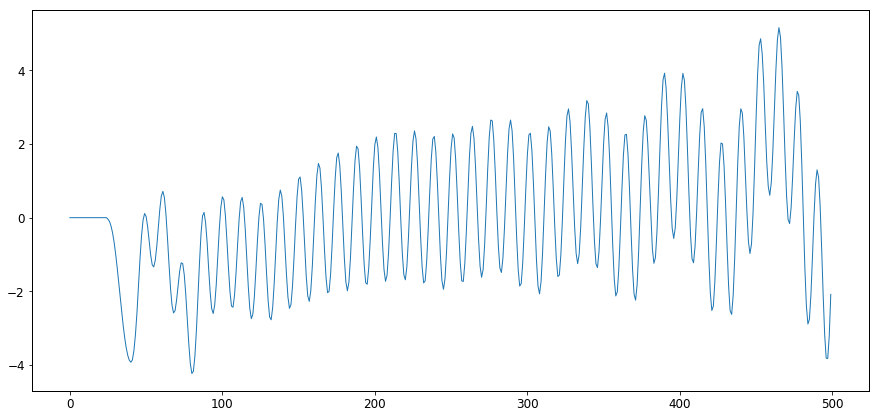

In [18]:
plt.figure(figsize=(15,7))
plt.plot(x_test[:20*n_steps])

# Below we work with real temperature data

The records consist of the mean temperature in Boston for each week over a 30-week period (n_steps). The target is the mean temperature the week after the window or the 31st week. Our training data are intervals taken over a 5 year period or 261 weeks.

In [19]:
import pandas as pd

In [20]:
bos_wthr = pd.read_csv('../project_boston_restaurants/data/boston_weather_2015_2011.csv', parse_dates=['EST'])
bos_wthr.head(3).transpose()

,0,1,2
EST,2015-01-01 00:00:00,2015-01-02 00:00:00,2015-01-03 00:00:00
Max TemperatureF,33,41,37
Mean TemperatureF,28,36,30
Min TemperatureF,22,31,22
Max Dew PointF,16,17,36
MeanDew PointF,8,15,20
Min DewpointF,5,11,8
Max Humidity,53,53,100
Mean Humidity,43,45,72
Min Humidity,32,37,43


Text(0,0.5,'Mean Temperature (F)')

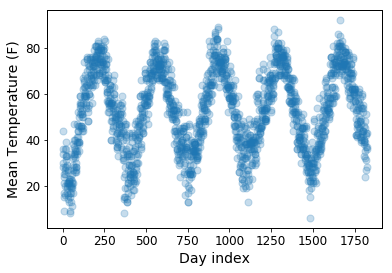

In [21]:
plt.scatter(bos_wthr.index, bos_wthr['Mean TemperatureF'], alpha=0.25)
plt.xlabel('Day index')
plt.ylabel('Mean Temperature (F)')

Let's create a simple ML regression model to predict temperature the next week based on the mean temperature the previous n weeks.

Compute the mean temperature for each week over the five year period:

In [22]:
bos_wthr['week'] = bos_wthr.index // 7
T_week = bos_wthr.groupby('week')['Mean TemperatureF'].mean()

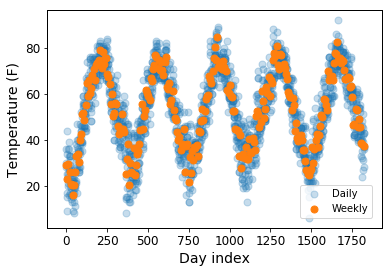

In [26]:
plt.scatter(bos_wthr.index, bos_wthr['Mean TemperatureF'], alpha=0.25, label='Daily')
plt.scatter(T_week.index * 7, T_week.values, label='Weekly')
plt.xlabel('Day index')
plt.ylabel('Temperature (F)')
plt.legend()

In [27]:
n_steps = 30
def get_features_and_target(batch_size):
    n = T_week.size
    arr = []
    for _ in range(batch_size):
        rand_idx = np.random.choice(np.arange(0, n - n_steps - 1))
        arr.append(T_week.values[rand_idx:rand_idx + n_steps + 1]) # last value is the target
    return np.array(arr)

In [28]:
train = get_features_and_target(batch_size=35)
test = get_features_and_target(batch_size=20)

In [29]:
col_names = ['week_' + str(i) for i in range(n_steps)] + ['target']
df_train = pd.DataFrame(train, columns=col_names)
df_test = pd.DataFrame(test, columns=col_names)

Text(0.5,1,'Three training instances')

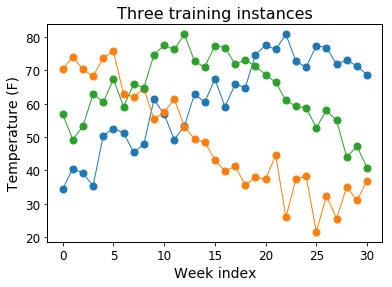

In [30]:
plt.plot(df_train.iloc[0].values, marker='o')
plt.plot(df_train.iloc[1].values, marker='o')
plt.plot(df_train.iloc[2].values, marker='o')
plt.xlabel('Week index')
plt.ylabel('Temperature (F)')
plt.title('Three training instances')

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linreg = LinearRegression()
linreg = linreg.fit(df_train.iloc[:,:-1], df_train.target)
print("rmse =", np.sqrt(mean_squared_error(df_test.target, linreg.predict(df_test.iloc[:,:-1]))))
print("R2 =", r2_score(df_test.target, linreg.predict(df_test.iloc[:,:-1])))

rmse = 14.675675738719608
R2 = 0.1317070523815964


In [32]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=20)
rf = rf.fit(df_train.iloc[:,:-1], df_train.target)
print("rmse =", np.sqrt(mean_squared_error(df_test.target, rf.predict(df_test.iloc[:,:-1]))))
print("R2 =", r2_score(df_test.target, rf.predict(df_test.iloc[:,:-1])))

rmse = 4.871502408321864
R2 = 0.9043255659159516


#### Now the RNN model

In [33]:
tf.reset_default_graph()

In [34]:
n_steps = 30 # weeks
n_inputs = 1
n_neurons = 100
n_outputs = 1

In [35]:
X = tf.placeholder(dtype=tf.float32, shape=(None, n_steps, n_inputs))
y = tf.placeholder(dtype=tf.float32, shape=(None, n_steps, n_outputs))

In [36]:
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
basic_cell = tf.contrib.rnn.LSTMCell(num_units=n_neurons, use_peepholes=True, activation=tf.nn.tanh)
cell = tf.contrib.rnn.OutputProjectionWrapper(basic_cell, output_size=n_outputs)
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [37]:
loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.0025)
training_op = optimizer.minimize(loss)

In [38]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [39]:
def fetch_batch(batch_size):
    # could be done with numpy vector operations (see Geron)
    a_batch = []
    b_batch = []
    for _ in range(batch_size):
        rnd_index = np.random.choice(np.arange(1, T_week.size - n_steps))
        a_batch.append(T_week.values[rnd_index - 1: rnd_index + n_steps - 1].reshape(-1, 1))
        b_batch.append(T_week.values[rnd_index: rnd_index + n_steps].reshape(-1, 1))
    return np.asarray(a_batch), np.asarray(b_batch)

In [40]:
# make test set
a_test = []
b_test = []
for i in range(df_test.shape[0]):
    a_test.append(df_test.iloc[i,:-1].values.reshape(-1, 1))
    b_test.append(df_test.iloc[i,1:].values.reshape(-1, 1))
a_test = np.asarray(a_test)
b_test = np.asarray(b_test)

In [41]:
n_iterations = 15000
model_name = './my_model.ckpt'

with tf.Session() as sess:
    init.run()
    
    for iteration in range(n_iterations + 1):
        X_batch, y_batch = fetch_batch(batch_size=35)
        sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
        if iteration % 1000 == 0:
            mse = loss.eval(feed_dict={X:a_test, y:b_test})
            print(iteration, "  MSE:", mse)
    #print(outputs.shape)
    #print(states.shape)
    save_path = saver.save(sess, model_name)
    idx = 100
    X_new = T_week.values[idx:idx + n_steps].reshape(1, n_steps, 1)
    X_target = T_week.values[idx + 1:idx + n_steps + 1]
    y_pred = sess.run(outputs, feed_dict={X:X_new})

0   MSE: 2586.8862
1000   MSE: 21.469906
2000   MSE: 11.563247
3000   MSE: 8.170126
4000   MSE: 6.3421454
5000   MSE: 5.445429
6000   MSE: 5.0827727
7000   MSE: 4.417383
8000   MSE: 3.9511309
9000   MSE: 3.7556002
10000   MSE: 3.8142748
11000   MSE: 3.5267546
12000   MSE: 3.3442135
13000   MSE: 3.2313068
14000   MSE: 3.0116363
15000   MSE: 3.681056


In [42]:
with tf.Session() as sess:
    saver.restore(sess, model_name)
    
    idx = 125
    #t_start = t[idx:idx + n_steps]
    f_start = T_week.values[idx:idx + n_steps] + 10*np.random.randn(n_steps)
    #f_start = np.zeros(n_steps)
    
    x_test = list(f_start)
    for h in range(100 * n_steps):
        x_pred = sess.run(outputs, feed_dict={X:np.array(x_test[-n_steps:]).reshape(1, n_steps, 1)})
        x_test.append(x_pred[0, -1, 0])

INFO:tensorflow:Restoring parameters from ./my_model.ckpt


Text(0,0.5,'Temperature (F)')

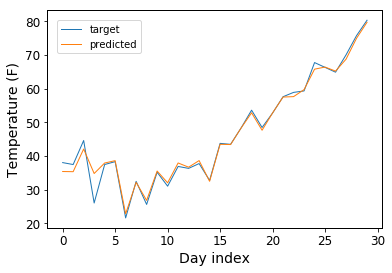

In [43]:
plt.plot(X_target, label='target')
plt.plot(y_pred.flatten(), label='predicted')
plt.legend()
plt.xlabel('Day index')
plt.ylabel('Temperature (F)')

The random forest model and the RNN give similar MSE values. One could try to optimize the RNN by varying the number of neurons, adding more layers, or applying dropout. Given how little data there is we will not do this.

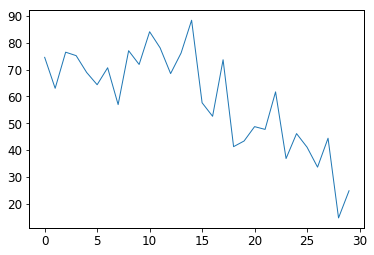

In [44]:
plt.plot(f_start)

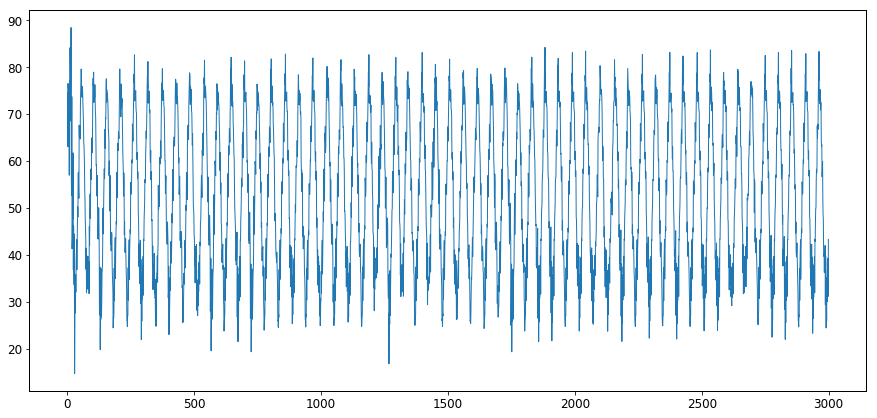

In [45]:
plt.figure(figsize=(15,7))
plt.plot(x_test[:100*n_steps])